# Milestone 2 - the daTaBABES

This notebook is the starting point of an analysis of the beer's popularity from two websites. We have explored and preprocessed the data.

**Popularity definition**: By popular we mean with respect to the number of **good** reviews

In [1]:
# imports

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

Users have rated the beers from two websites, RateBeer and BeerAdvocate, thus we get reviews of users from two distinct datasets. The reviews are in txt files, thus we convert the txt files into csv so that we can manipulate the data more easily. By doing this, we get as much as data as we can. 

The conversion of the txt files into csv files is done in the notebook 'preprocessing_txt.ipynb'.

Since our goal is to analyze the ratings, what is important here is to see if the ratings from the two websited differ. Can we merge the two datasets without falsing our final results? 

In [2]:
# laoding the two datasets 

#ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
#ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')


# loading the users dataset 

users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')
users_rb_df = pd.read_csv('data/RateBeer/users.csv')

# loading the beers dataset

beers_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_rb_df = pd.read_csv('data/RateBeer/beers.csv')

In [3]:
nbr_ratings_ba = ratings_ba_df.shape[0]
nbr_ratings_rb = ratings_rb_df.shape[0]

print('Number of ratings in BeerAdvocate: {}'.format(nbr_ratings_ba))
print('Number of ratings in RateBeer: {}'.format(nbr_ratings_rb))

NameError: name 'ratings_ba_df' is not defined

### Distribution of the average rating in BeerAdvocarte

In [ ]:
ratings_ba_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

### Distribution the average rating in RateBeer

In [ ]:
ratings_rb_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Number of beers in BeerAdvocate and RateBeer
print("Number of beers in BeerAdvocate:", len(ratings_ba_df))
print("Number of beers in RateBeer:", len(ratings_rb_df))

# BeerAdvocate - Histogram
axes[0, 0].hist(ratings_ba_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Beer Ratings in BeerAdvocate')

# RateBeer - Histogram
axes[0, 1].hist(ratings_rb_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Beer Ratings in RateBeer')

# BeerAdvocate - Boxplot
sns.boxplot(ratings_ba_df['rating'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Boxplot of Beer Ratings in BeerAdvocate')

# RateBeer - Boxplot
sns.boxplot(ratings_rb_df['rating'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Boxplot of Beer Ratings in RateBeer')

plt.tight_layout()
plt.show()

As observed from the tables and the plot above, eventhough the distributions have a similar shape, i.e. normal distribution, they have a different average mean ratings. Indeed, users from the RateBeer dataset seem to be harsher in their ratings. 

Now, as defined above, our popularity definition concerns the number of **good** ratings. A question that arises is: what can be considered as a good rating? 

The ratings are continuous numbers between 0 to 5. One idea is to keep the ratings above the **average mean** of the two datasets and consider them as **good** rating. With this, we take in account the different distribution of the ratings into the two datasets and find a relatively good threshold. 

In [ ]:
mean_ba = ratings_ba_df.rating.mean()
mean_rb = ratings_rb_df.rating.mean()

print("Mean rating in BeerAdvocate:", mean_ba)
print("Mean rating in RateBeer:", mean_rb)

Now, let's see how many users each country has

As we have observed that the users are separated by states in the US, we change a bit the users data frame to consider only the US as a country and not as separated states.

In [ ]:
users_rb_df['location'] = users_rb_df['location'].str.split(',').str[0]
users_ba_df['location'] = users_ba_df['location'].str.split(',').str[0]

In [11]:
# number of users per country, in RateBeer
rb_user_count_country = users_rb_df.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users in RateBeer')

# number of users per country, in BeerAdvocate
ba_user_count_country = users_ba_df.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users in BeerAdvocate')

In [12]:
# merge the two above data frames to count the total number of users per country
users_country = rb_user_count_country.merge(ba_user_count_country, on='location')
users_country['total nb of users'] = users_country['nb users in RateBeer'] + users_country['nb users in BeerAdvocate']
users_country = users_country.sort_values('total nb of users', ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'England'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Denmark')])

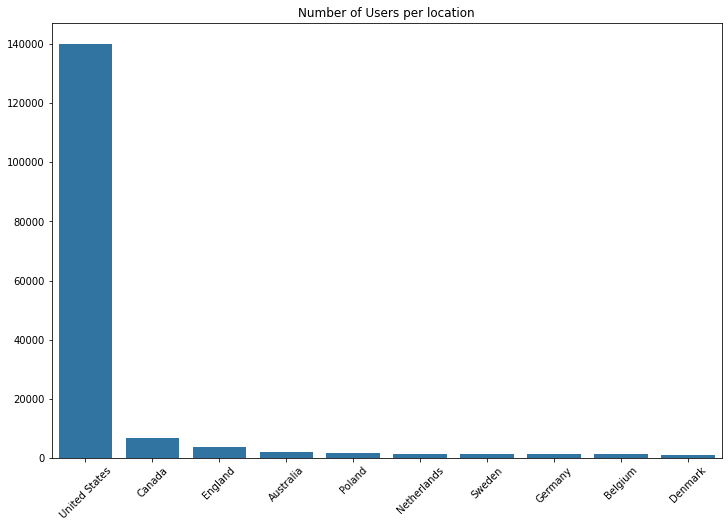

In [13]:
# plotting the distribution
plt.figure(figsize=(12,8))
sns.barplot(x=users_country['location'].values[:10], y=users_country['total nb of users'].values[:10])
plt.title('Number of Users per location')
plt.xticks(rotation=45)

As we see, the US has much more users than the other countries. This leads us to think that by focusing on this country, we will get the most diverse reviews as they come from many different users. If we would consider Canada for example, we could have bias results as there are not so many users and the reviews come from a small set of people, leading us to provide a perfect beer for very few people. For this reason, our analysis will be focused on the US only.

Let's filter to get only US users

In [49]:
US_country = 'United States'

# keep only the rows where the user country is United States
users_ba_df = users_ba_df[users_ba_df.location == US_country]
users_rb_df = users_rb_df[users_rb_df.location == US_country]

# to put at the end

In order to analyze the reviews of users, we create dictionaries that contain key words that are commonly used to describe some aspects of a beer. From these dictionaries, we look for the keywords in the reviews and we will then analyze more in depth wether it is used with in a positive or negative way. At the end of this part, we should be able to get the best aroma, taste, palate, and other perfect beer caracteristics for each month.


First, let's define our dictionaries and look wether they are relevant or not by looking at the distribution of key words in the reviews.

In [16]:
aroma = ('Malty, biscuity, breadlike, grainy, rich, deep, roasty, cereal, cookie-like, coffeeish, caramelly, toffee-like, molasses-like, malt complexity, smoky, sweet, autumnal, burnt cream, scalded milk, oatmeal, rustic, layered'.split(',')) + ('Piney, citrusy, grapefruity, earthy, musty, spicy, sharp, bright, fresh, herbal, zippy, lemony, newly-mown lawn, aromatic, floral, springlike, brilliant, sprucelike, juniper-like, minty, pungent, elegant, grassy'.split(','))
color = 'pale straw, staw, pale gold, deep gold, pale amber, medium amber, deep amber, amber brown, brown, ruby brown, deep brown, black'.split(',')


In [17]:
aroma_dict = {x:0 for x in aroma}
color_dict = {x:0 for x in color}

In [3]:
# extracting texts
texts_RB = []
with open('data/RateBeer/reviews_RateBeer.txt') as f:
    for i,l in enumerate(f):
        splitted = l.split(':')
        if 'text' in splitted[0]:
            texts_RB.append(splitted[1].replace('\n',''))

In [ ]:
texts_BA = []
with open('data/BeerAdvocate/reviews_BeerAdvocate.txt') as f:
    for i,l in enumerate(f):
        splitted = l.split(':')
        if 'text' in splitted[0]:
            texts_BA.append(splitted[1].replace('\n',''))

In [26]:
texts = texts_BA + texts_RB

In [25]:
key_words_lists = [aroma, color]
key_words_dict = [aroma_dict, color_dict]
categories = ["Aroma", "Color"]

In [27]:
for i, ls in enumerate(key_words_lists):
    current_dict = key_words_dict[i]
    
    for w in ls:
        for text in texts:
            if w in text:
                current_dict[w] += 1

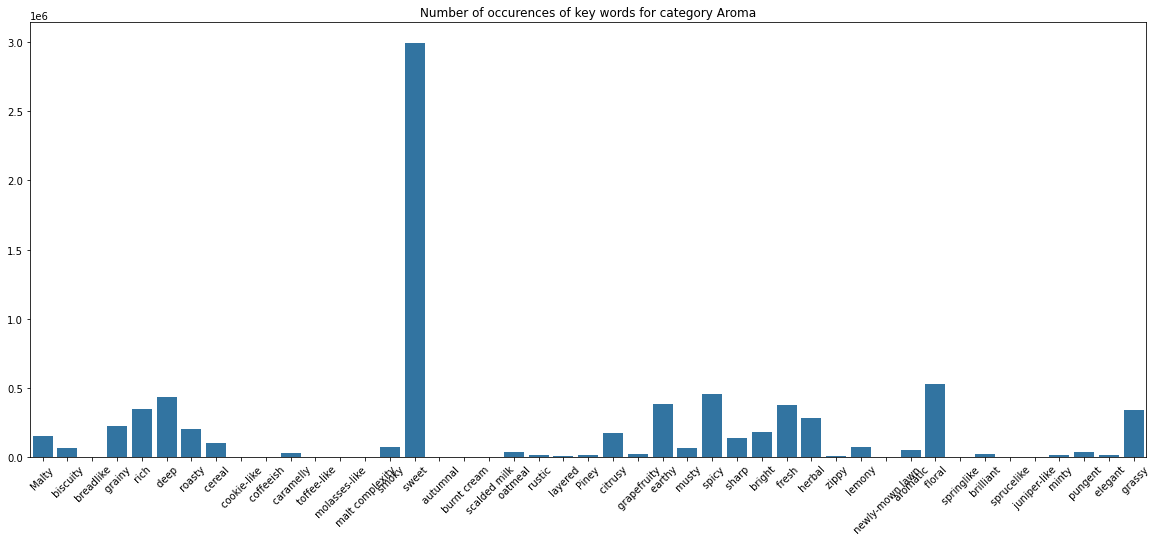

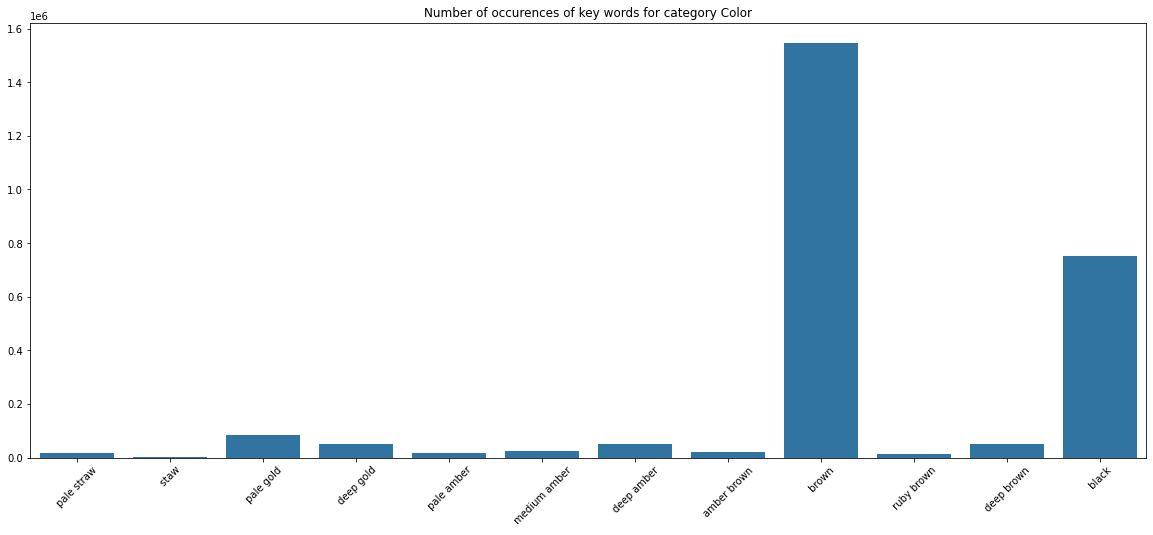

In [34]:
# plotting the occurences per catefory
for i,d in enumerate(key_words_dict):
    category = categories[i]
    plt.figure(figsize=(20,8))
    sns.barplot(x=d.keys(), y=d.values())
    plt.title('Number of occurences of key words for category ' + category)
    plt.xticks(rotation=45)

As we see, in aroma, "sweet" is much more present than the other key words and in color "brown" dominates. Let's remove them to have a better idea of the plot for the other key words.

In [42]:
sweet = aroma_dict.pop('sweet')
brown = color_dict.pop(' brown')

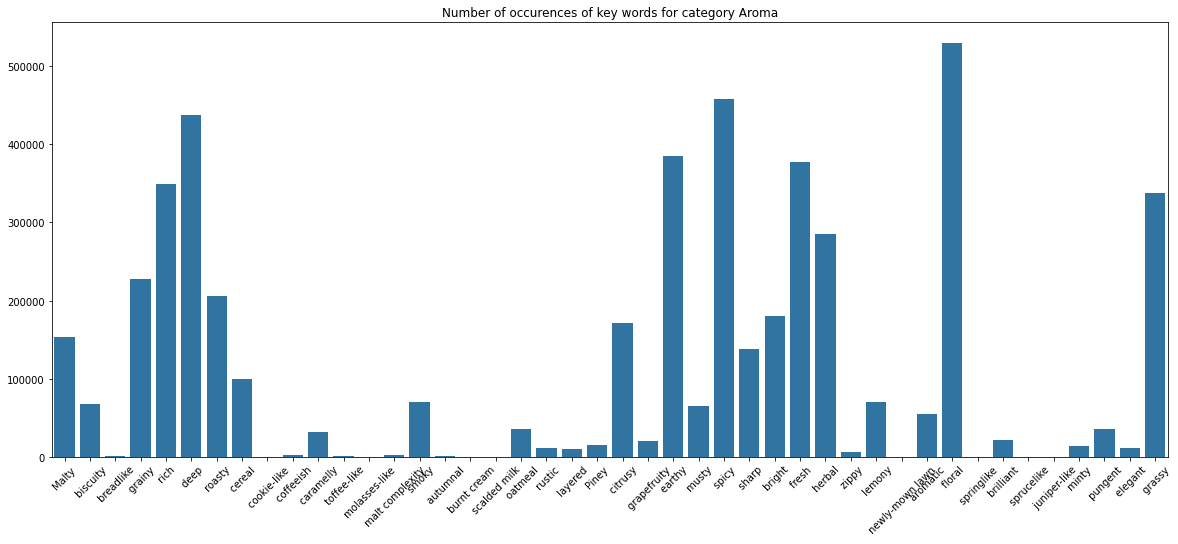

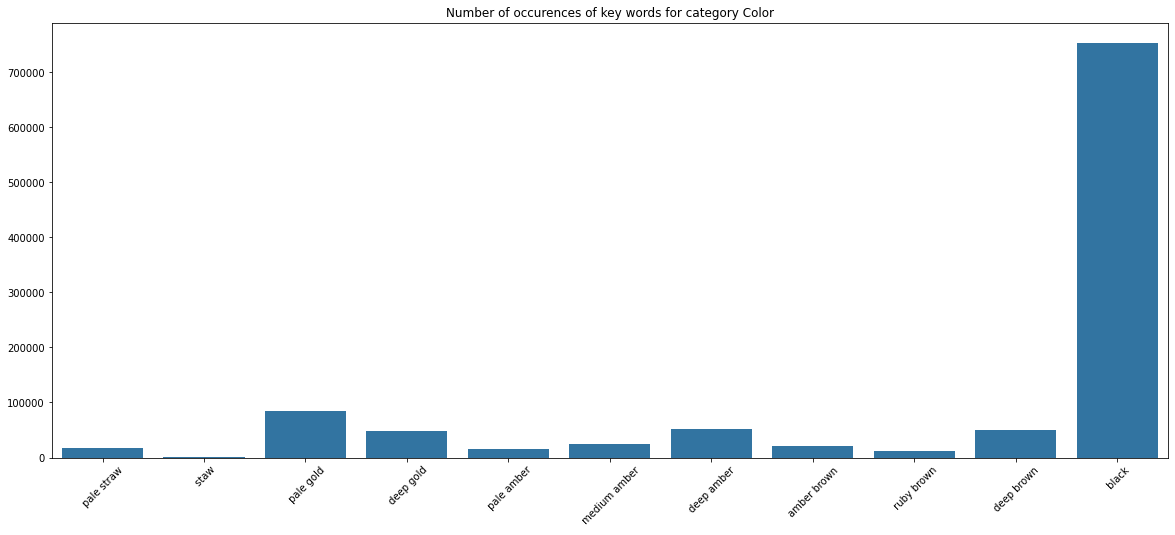

In [43]:
# plotting the occurences per category
for i,d in enumerate(key_words_dict):
    category = categories[i]
    plt.figure(figsize=(20,8))
    sns.barplot(x=d.keys(), y=d.values())
    plt.title('Number of occurences of key words for category ' + category)
    plt.xticks(rotation=45)